In [1]:
import pandas as pd 
import numpy as np 

In [5]:
df = pd.read_csv('data/diabetes.csv')

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
from sklearn.preprocessing import StandardScaler


In [10]:
ss=StandardScaler()

In [11]:
X= df.drop('Outcome',axis=1)
Y=df['Outcome']

In [15]:
XX= ss.fit_transform(X)

In [16]:
XX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x1,x2,y1,y2=train_test_split(XX,Y,random_state=20,test_size=0.2,stratify=Y)

array([[-0.54791859, -0.65393918,  0.04624525, ...,  1.07975556,
         0.61949791, -0.70119842],
       [ 0.04601433, -0.09059057,  0.04624525, ...,  1.58743255,
         1.30506485, -0.61611067],
       [ 1.82781311, -0.62264204,  0.35643175, ...,  0.1151693 ,
        -0.90868214,  2.5321362 ],
       ...,
       [-1.14185152, -0.49745345, -0.26394125, ...,  1.20667481,
        -0.9026419 , -0.95646168],
       [-1.14185152, -0.93561349, -0.05715025, ...,  1.00360402,
        -0.27445722, -0.70119842],
       [-1.14185152, -0.24707629,  0.56322275, ..., -0.12597727,
         1.21446129, -1.04154944]])

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
pipeline= LogisticRegression()

In [26]:
pipeline.fit(x1,y1)

LogisticRegression()

In [27]:
y_ped= pipeline.predict(x2)

In [28]:
accuracy_score(y_ped,y2)

0.8116883116883117

In [29]:
from sklearn.svm import SVC

In [31]:
pi=SVC(kernel='rbf')

In [33]:
pi.fit(x1,y1)

SVC()

In [35]:
yy=pi.predict(x2)

In [36]:
accuracy_score(yy,y2)

0.7987012987012987

In [48]:
d=df.corr()
type(d)

pandas.core.frame.DataFrame

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

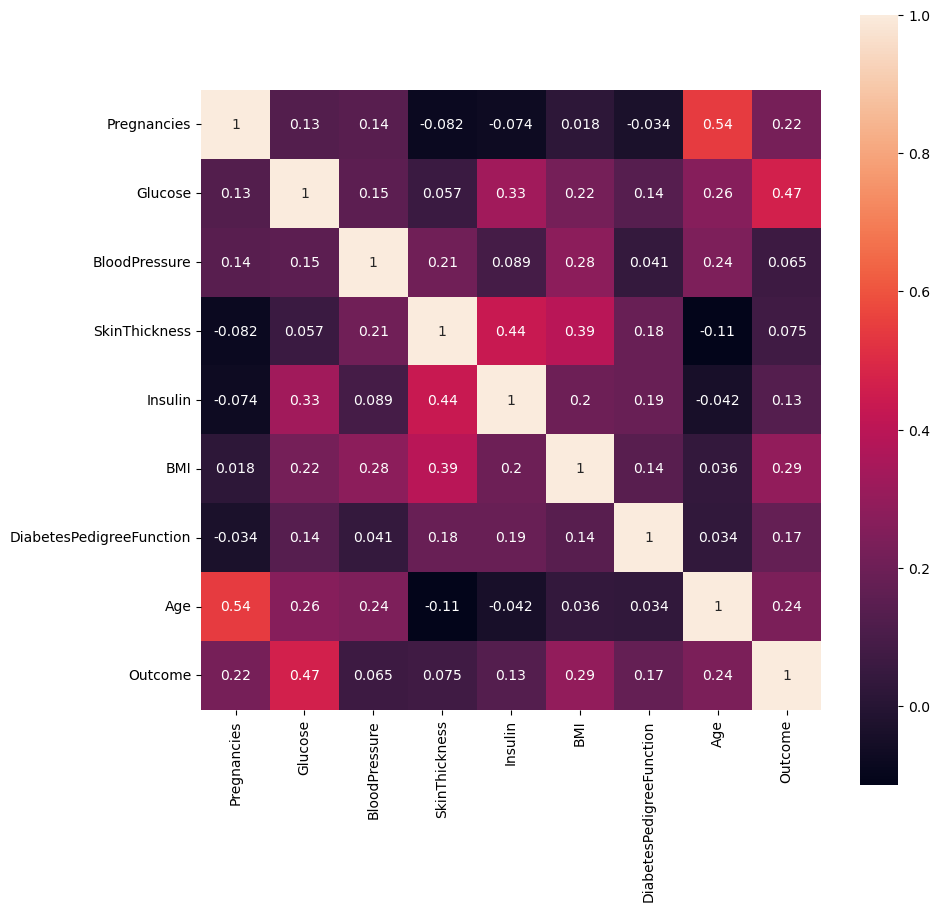

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(d,fmt='.2g',square=True,cbar=True,annot=True)